In [1]:
import numpy as np
import pandas as pd
from pathlib  import Path

In [2]:
def read_all_versions(parent_path, softwares, templates, name_patterns, cost_functions=[""], dtype=float):
    parent_path = Path(parent_path)
    data = {software: {template: {cost_function: None for cost_function in cost_functions} for template in templates} for software in softwares}

    for software in softwares:
        for template in templates:
            for cost_function in cost_functions:
                data_list = []
                for name_pattern in name_patterns:
                    name = name_pattern(software, template)

                    path = parent_path / software / template / cost_function / "reports" / name
                    # "arrays" /
                    if path.exists():
                        data_list.append(np.loadtxt(path, dtype=dtype))

                if data_list:
                    data[software][template][cost_function] = np.concatenate(data_list)

    return data

In [3]:
def func_fd_passed(s, t):
        return f"{s}_FD_all_fine.txt"

parent_path = Path("/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/diagrams")
softwares = ["flirt"]
templates = ["MNI152NLin2009cAsym_res-01"]
cost_functions = ["normcorr", "corratio", "mutualinfo", "normmi"]
data = read_all_versions(parent_path, softwares, templates, [func_fd_passed], cost_functions=cost_functions)

In [4]:
# Initialize a dictionary to store the standard deviations
std_results = {}

# Traverse the nested dictionary
for software, templates in data.items():
    std_results[software] = {}
    for template, cost_functions in templates.items():
        std_results[software][template] = {}
        for cost_function, array in cost_functions.items():
            # Compute standard deviation
            std = np.std(array, axis=1)
            std_results[software][template][cost_function] = std

In [5]:
std_flirt = std_results['flirt']['MNI152NLin2009cAsym_res-01']
from scipy.stats import shapiro, levene, f_oneway

In [6]:
f_oneway(std_flirt["normcorr"],std_flirt["corratio"],std_flirt["normmi"],std_flirt["mutualinfo"])

F_onewayResult(statistic=100.73232120579381, pvalue=7.723828356175875e-48)

In [7]:
# from scipy.stats import kruskal, friedmanchisquare
# friedmanchisquare(std_flirt["normcorr"],std_flirt["corratio"],std_flirt["normmi"],std_flirt["mutualinfo"])

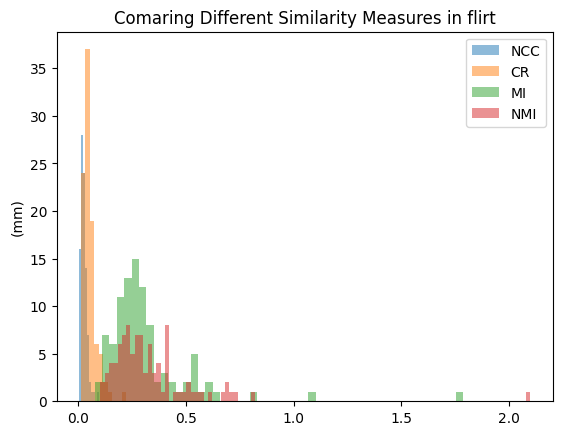

In [8]:
import matplotlib.pyplot as plt
plt.hist(std_flirt["normcorr"], alpha=0.5)
plt.hist(std_flirt["corratio"], alpha=0.5)
plt.hist(std_flirt["normmi"], bins=50, alpha=0.5)
plt.hist(std_flirt["mutualinfo"], bins=100, alpha=0.5)
plt.legend(["NCC", "CR", "MI", "NMI"])
plt.title("Comaring Different Similarity Measures in flirt")
plt.ylabel("(mm)")
plt.show()

In [9]:
np.argmax(std_flirt["mutualinfo"])

19

In [10]:
bagel = pd.read_csv("bagel.tsv", delimiter='\t')
bagel

,participant_id,bids_participant_id,visit_id,DATE_OF_BIRTH,SEX,COHORT_DEFINITION,DATE_OF_DIAGNOSIS,EDUCATION,AGE,PRIMARY_DIAGNOSIS,...,UPDRS_3_OFF,UPDRS_4,MOCA,BENTON_LINE_ORIENTATION,CLOCK_DRAWING,LETTER_NUMBER_SEQUENCING,MODIFIED_BOSTON_NAMING_TEST,MODIFIED_SEMANTIC_FLUENCY,SYMBOL_DIGIT_MODALITIES,UPSIT
0,100001,sub-100001,BL,05/1953,1,Parkinson's Disease,09/2019,16.0,67.4,1.0,...,24.0,NaN,NaN,26.0,NaN,12.0,58.0,10.0,56.0,NaN
1,100001,sub-100001,SC,05/1953,1,Parkinson's Disease,09/2019,16.0,67.3,NaN,...,NaN,NaN,26.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,100001,sub-100001,V04,05/1953,1,Parkinson's Disease,09/2019,16.0,68.5,1.0,...,33.0,NaN,26.0,26.0,7.0,9.0,56.0,11.0,56.0,NaN
3,100001,sub-100001,V06,05/1953,1,Parkinson's Disease,09/2019,16.0,69.5,1.0,...,37.0,NaN,25.0,24.0,7.0,9.0,57.0,12.0,50.0,NaN
4,100001,sub-100001,V08,05/1953,1,Parkinson's Disease,09/2019,16.0,70.5,1.0,...,43.0,NaN,26.0,20.0,5.0,10.0,58.0,8.0,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,92834,sub-92834,BL,12/1948,1,Prodromal,NaN,16.0,66.1,23.0,...,0.0,NaN,NaN,28.0,NaN,12.0,NaN,15.0,54.0,NaN
14443,92834,sub-92834,SC,12/1948,1,Prodromal,NaN,16.0,65.8,23.0,...,0.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14444,92834,sub-92834,V04,12/1948,1,Prodromal,NaN,16.0,67.4,23.0,...,0.0,NaN,28.0,28.0,NaN,14.0,NaN,15.0,53.0,NaN
14445,92834,sub-92834,V08,12/1948,1,Prodromal,NaN,16.0,69.1,23.0,...,0.0,0.0,29.0,30.0,NaN,13.0,NaN,18.0,52.0,NaN


In [11]:
pd_ids = np.loadtxt("PD_selected_subjects.txt", dtype="str")
hc_ids = np.loadtxt("HC_selected_subjects.txt", dtype="str")

In [12]:
pd_df = bagel[(bagel["bids_participant_id"].isin(pd_ids)) & (bagel["visit_id"] == "BL")]
hc_df = bagel[(bagel["bids_participant_id"].isin(hc_ids)) & (bagel["visit_id"] == "BL")]

<Axes: >

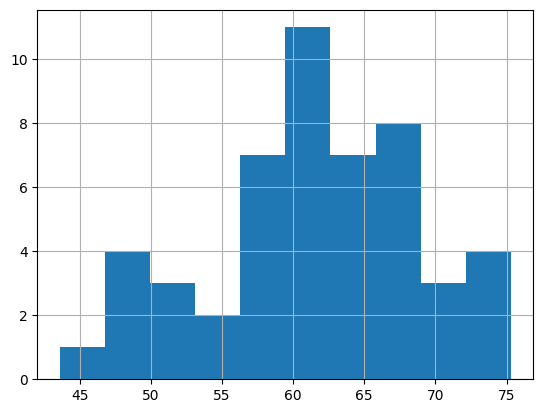

In [13]:
pd_df["AGE"].hist()

In [14]:
pd_df["AGE"].mean()

61.63400000000001

<Axes: >

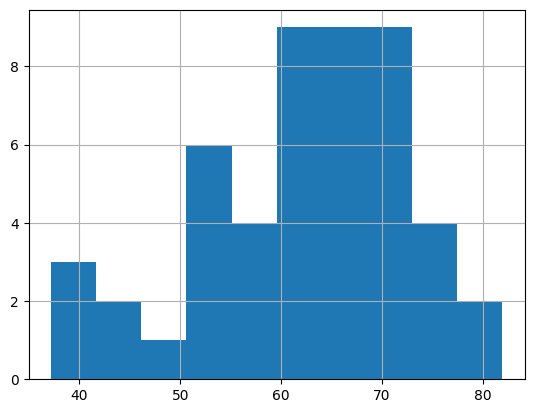

In [15]:
hc_df["AGE"].hist()

In [16]:
hc_df["AGE"].mean()

62.17755102040816

In [17]:
hc_df["SEX"].value_counts()

SEX
1    26
0    24
Name: count, dtype: int64

In [18]:
pd_df["SEX"].value_counts()

SEX
1    28
0    22
Name: count, dtype: int64

In [19]:
path_flirt = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/flirt/MNI152NLin2009cAsym_res-01/mutualinfo/reports/flirt_FD_all_fine.txt"
path_ants = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/test_within/ants/MNI152NLin2009cAsym_res-01/reports/ants_FD_all_fine.txt"

In [20]:
sd_flirst = np.std(np.loadtxt(path_flirt), axis=1)
sd_ants = np.std(np.loadtxt(path_ants), axis=1)

In [21]:
import scipy

In [22]:
scipy.stats.mannwhitneyu(sd_flirst, sd_ants)

MannwhitneyuResult(statistic=8701.0, pvalue=1.9817000393848453e-27)

In [23]:
len(sd_ants)

98

Text(0.5, 0, '(mm)')

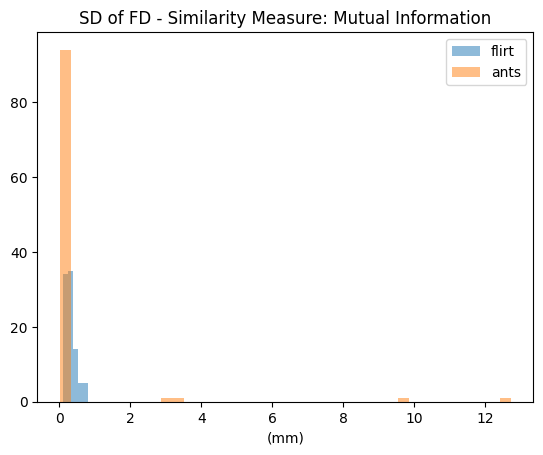

In [24]:
import matplotlib.pyplot as plt
plt.hist(sd_flirst, alpha=0.5, bins=5)
plt.hist(sd_ants, alpha=0.5, bins=40)
plt.legend(["flirt", "ants"])
plt.title("SD of FD - Similarity Measure: Mutual Information")
plt.xlabel("(mm)")

In [25]:
np.argmax(sd_ants,)

18

In [26]:
np.argsort(sd_ants)[-4:][::-1]

array([18, 59, 15, 11])

In [27]:
np.argsort(sd_ants)

array([54,  9, 45, 16, 10, 88,  7, 44, 90,  6, 93, 79,  8, 48, 40, 14, 20,
       26, 23, 30, 78, 77, 95, 35,  3, 76, 94, 66,  4, 34, 63, 75, 38, 29,
       51, 13, 22, 92, 42,  0, 61, 70, 68,  1, 87, 73, 19, 84, 60, 36, 33,
       17, 47, 82, 39, 67, 97, 53, 21, 27, 56, 81, 31, 49, 83, 69, 12,  2,
       64, 46, 91, 55, 96, 80, 71, 58, 62, 25, 74, 43, 28, 57, 86, 52, 72,
       89, 32, 37, 85,  5, 50, 24, 41, 65, 11, 15, 59, 18])

In [28]:
# sub-3365,sub-3120, sub-3020, sub-3464

In [29]:
corratio = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/flirt/MNI152NLin2009cAsym_res-01/corratio/reports/FD_MAD.csv"
normmi = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/flirt/MNI152NLin2009cAsym_res-01/normmi/reports/FD_MAD.csv"
normcorr = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/flirt/MNI152NLin2009cAsym_res-01/normcorr/reports/FD_MAD.csv"
mutualinfo = "/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/outputs_plots/flirt/MNI152NLin2009cAsym_res-01/mutualinfo/reports/FD_MAD.csv"


In [30]:
import pandas as pd

In [31]:
corratio_df = pd.read_csv(corratio)
normmi_df = pd.read_csv(normmi)
normcorr_df = pd.read_csv(normcorr)
mutualinfo_df = pd.read_csv(mutualinfo)

dfs = [corratio_df, normmi_df, normcorr_df, mutualinfo_df]

In [32]:
corratio_df

,Participant_ID,FD_std_flirt_MNI152NLin2009cAsym_res-01_corratio,MAD_flirt_MNI152NLin2009cAsym_res-01_corratio,QC_status_flirt_MNI152NLin2009cAsym_res-01_corratio,cohort
0,sub-40882,0.034352,0.030965,fine,PD
1,sub-179784,0.026866,0.024551,fine,PD
2,sub-75562,0.017651,0.015148,fine,PD
3,sub-3001,0.015791,0.019835,fine,PD
4,sub-3078,0.035090,0.026783,fine,PD
...,...,...,...,...,...
95,sub-3709,0.362625,0.429553,failed,PD
96,sub-3700,0.138380,0.119692,failed,PD
97,sub-3403,112.241258,39.083019,failed,PD
98,sub-116230,0.111927,0.381929,failed,HC


In [33]:
# from functools import reduce
# merged_df = reduce(lambda left, right: pd.merge(left, right, on='Participant_ID'), dfs)


In [34]:
import pandas as pd
from functools import reduce

merged_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    # Drop or rename 'cohort' in df
    df = df.drop(columns=['cohort'])  # or rename
    merged_df = pd.merge(merged_df, df, on='Participant_ID')


In [35]:
merged_df

,Participant_ID,FD_std_flirt_MNI152NLin2009cAsym_res-01_corratio,MAD_flirt_MNI152NLin2009cAsym_res-01_corratio,QC_status_flirt_MNI152NLin2009cAsym_res-01_corratio,cohort,FD_std_flirt_MNI152NLin2009cAsym_res-01_normmi,MAD_flirt_MNI152NLin2009cAsym_res-01_normmi,QC_status_flirt_MNI152NLin2009cAsym_res-01_normmi,FD_std_flirt_MNI152NLin2009cAsym_res-01_normcorr,MAD_flirt_MNI152NLin2009cAsym_res-01_normcorr,QC_status_flirt_MNI152NLin2009cAsym_res-01_normcorr,FD_std_flirt_MNI152NLin2009cAsym_res-01_mutualinfo,MAD_flirt_MNI152NLin2009cAsym_res-01_mutualinfo,QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo
0,sub-40882,0.034352,0.030965,fine,PD,0.199588,0.215395,fine,0.034352,0.030965,fine,0.201775,0.169283,fine
1,sub-179784,0.026866,0.024551,fine,PD,0.169951,0.580648,fine,0.026866,0.024551,fine,0.330013,0.828447,fine
2,sub-75562,0.017651,0.015148,fine,PD,1.093123,0.872655,fine,0.017651,0.015148,fine,0.518250,0.428233,fine
3,sub-3001,0.015791,0.019835,fine,PD,0.180874,0.319761,fine,0.015791,0.019835,fine,0.219461,0.300259,fine
4,sub-3078,0.035090,0.026783,fine,PD,0.310526,0.293834,fine,0.035090,0.026783,fine,0.340902,0.304898,fine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub-3709,0.362625,0.429553,failed,PD,0.781292,2.167339,failed,0.362625,0.429553,failed,0.939617,1.016371,failed
96,sub-3700,0.138380,0.119692,failed,PD,1.852810,1.848501,failed,0.138380,0.119692,failed,50.498568,18.234794,failed
97,sub-3403,112.241258,39.083019,failed,PD,1.786622,3.664702,fine,112.241258,39.083019,failed,1.013354,0.806999,failed
98,sub-116230,0.111927,0.381929,failed,HC,0.375159,1.389458,failed,0.111927,0.381929,failed,2.530571,2.122980,failed


In [36]:
fine_in_all = merged_df[(merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01_corratio"] == "fine")
          & (merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"] == "fine")
          & (merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01_normcorr"] == "fine")
          & (merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01_normmi"] == "fine")
]

In [37]:
merged_df_cost = merged_df

In [38]:
from scipy.stats import kruskal, friedmanchisquare
friedmanchisquare(fine_in_all["FD_std_flirt_MNI152NLin2009cAsym_res-01_corratio"], 
                  fine_in_all["FD_std_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"],
                  fine_in_all["FD_std_flirt_MNI152NLin2009cAsym_res-01_normcorr"],
                  fine_in_all["FD_std_flirt_MNI152NLin2009cAsym_res-01_normmi"])

FriedmanchisquareResult(statistic=249.5806451612902, pvalue=8.063559202321925e-54)

In [39]:
from pathlib import Path
path = Path("/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/test_within/")
flirt_asym_df = pd.read_csv(path / "flirt/MNI152NLin2009cAsym_res-01/reports/FD_MAD.csv")
flirt_sym_df = pd.read_csv(path / "flirt/MNI152NLin2009cSym_res-1/reports/FD_MAD.csv")
ants_asym_df = pd.read_csv(path / "ants/MNI152NLin2009cAsym_res-01/reports/FD_MAD.csv")
ants_sym_df = pd.read_csv(path / "ants/MNI152NLin2009cSym_res-1/reports/FD_MAD.csv")
spm_asym_df = pd.read_csv(path / "spm/MNI152NLin2009cAsym_res-01/reports/FD_MAD.csv")
spm_sym_df = pd.read_csv(path / "spm/MNI152NLin2009cSym_res-1/reports/FD_MAD.csv")


In [40]:
dfs = [flirt_asym_df, flirt_sym_df, ants_asym_df,ants_sym_df,spm_asym_df,spm_sym_df]

In [41]:
merged_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    # Drop or rename 'cohort' in df
    df = df.drop(columns=['cohort'])  # or rename
    merged_df = pd.merge(merged_df, df, on='Participant_ID')


In [42]:
fine_in_all_asym = merged_df[(merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01"] == "fine")
          & (merged_df["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "fine")
          & (merged_df["QC_status_ants_MNI152NLin2009cAsym_res-01"] == "fine")
]

In [43]:
friedmanchisquare(fine_in_all_asym["FD_std_flirt_MNI152NLin2009cAsym_res-01"], 
                  fine_in_all_asym["FD_std_spm_MNI152NLin2009cAsym_res-01"],
                  fine_in_all_asym["FD_std_ants_MNI152NLin2009cAsym_res-01"],
)

FriedmanchisquareResult(statistic=121.81081081081084, pvalue=3.540939563804385e-27)

In [44]:
fine_in_all_sym = merged_df[(merged_df["QC_status_flirt_MNI152NLin2009cSym_res-1"] == "fine")
          & (merged_df["QC_status_spm_MNI152NLin2009cSym_res-1"] == "fine")
          & (merged_df["QC_status_ants_MNI152NLin2009cSym_res-1"] == "fine")
]

In [45]:
friedmanchisquare(fine_in_all_sym["FD_std_flirt_MNI152NLin2009cSym_res-1"], 
                  fine_in_all_sym["FD_std_spm_MNI152NLin2009cSym_res-1"],
                  fine_in_all_sym["FD_std_ants_MNI152NLin2009cSym_res-1"],
)

FriedmanchisquareResult(statistic=131.3571428571429, pvalue=2.993359299444863e-29)

In [46]:
merged_df[(merged_df["QC_status_flirt_MNI152NLin2009cAsym_res-01"] == "fine")]["MAD_flirt_MNI152NLin2009cAsym_res-01"].median()

0.0536066610583304

In [47]:
merged_df[(merged_df["QC_status_ants_MNI152NLin2009cAsym_res-01"] == "fine")]["MAD_ants_MNI152NLin2009cAsym_res-01"].median()

0.07725964616606046

In [48]:
merged_df[(merged_df["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "fine")]["MAD_spm_MNI152NLin2009cAsym_res-01"].median()

2.105698015952839e-09

In [49]:
merged_df[(merged_df["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "failed")]["MAD_spm_MNI152NLin2009cAsym_res-01"].median()

4.7631278121684774e-08

In [50]:
verou_df = pd.read_csv("/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/verrou_plots/spm/MNI152NLin2009cAsym_res-01/reports/FD_MAD.csv")

Text(0.5, 0, '(mm)')

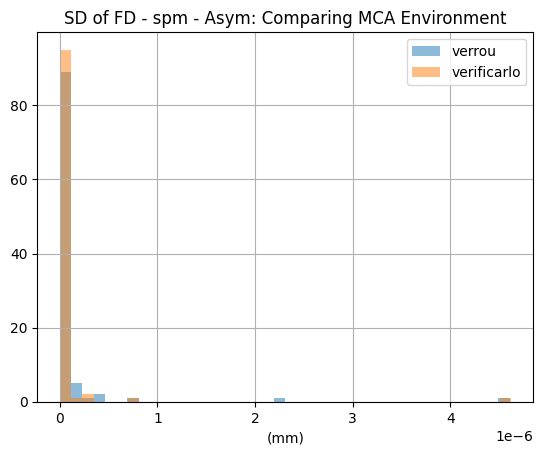

In [51]:
verou_df["FD_std_spm_MNI152NLin2009cAsym_res-01"].hist(bins=40, alpha=0.5)
merged_df["FD_std_spm_MNI152NLin2009cAsym_res-01"].hist(bins=40, alpha=0.5)
plt.legend(["verrou", "verificarlo"])
plt.title("SD of FD - spm - Asym: Comparing MCA Environment")
plt.xlabel("(mm)")

<Axes: >

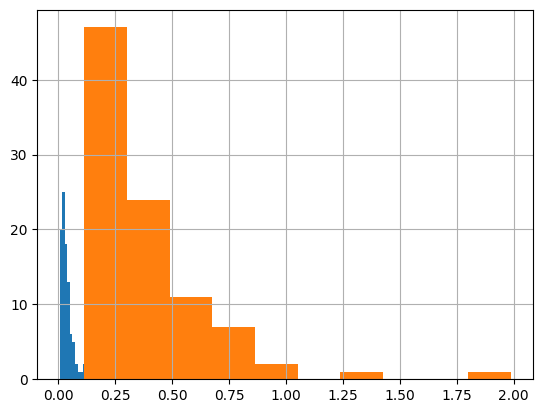

In [52]:
merged_df_cost[merged_df_cost["QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"] == "fine"]["MAD_flirt_MNI152NLin2009cAsym_res-01_corratio"].hist()
merged_df_cost[merged_df_cost["QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"] == "fine"]["MAD_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"].hist()
# merged_df[merged_df["QC_status_ants_MNI152NLin2009cAsym_res-01"] == "fine"]["MAD_ants_MNI152NLin2009cAsym_res-01"].median()


In [53]:
merged_df.sort_values(by="MAD_ants_MNI152NLin2009cAsym_res-01", ascending=False).head(15)

,Participant_ID,FD_std_flirt_MNI152NLin2009cAsym_res-01,MAD_flirt_MNI152NLin2009cAsym_res-01,QC_status_flirt_MNI152NLin2009cAsym_res-01,cohort,FD_std_flirt_MNI152NLin2009cSym_res-1,MAD_flirt_MNI152NLin2009cSym_res-1,QC_status_flirt_MNI152NLin2009cSym_res-1,FD_std_ants_MNI152NLin2009cAsym_res-01,MAD_ants_MNI152NLin2009cAsym_res-01,QC_status_ants_MNI152NLin2009cAsym_res-01,FD_std_ants_MNI152NLin2009cSym_res-1,MAD_ants_MNI152NLin2009cSym_res-1,QC_status_ants_MNI152NLin2009cSym_res-1,FD_std_spm_MNI152NLin2009cAsym_res-01,MAD_spm_MNI152NLin2009cAsym_res-01,QC_status_spm_MNI152NLin2009cAsym_res-01,FD_std_spm_MNI152NLin2009cSym_res-1,MAD_spm_MNI152NLin2009cSym_res-1,QC_status_spm_MNI152NLin2009cSym_res-1
99,sub-3620,0.149529,0.345592,failed,HC,0.748862,0.622919,failed,10.935974,11.031588,failed,8.357388,9.484427,fine,8.662921e-08,1.497347e-07,failed,1.652494e-07,1.526474e-07,failed
56,sub-3969,0.060373,0.084765,fine,HC,0.066959,0.078587,fine,9.594427,9.773278,fine,9.710393,13.395550,failed,9.968460e-08,8.193852e-08,failed,1.337336e-07,1.103155e-07,fine
17,sub-3365,0.038937,0.044786,fine,PD,0.095583,0.082254,fine,12.712657,8.310506,fine,12.261031,6.221022,fine,1.547579e-08,5.355087e-08,failed,1.092941e-08,1.774541e-08,failed
98,sub-116230,0.155635,0.205450,failed,HC,0.077252,0.121580,failed,11.364920,7.831633,failed,12.978348,13.166702,failed,2.912035e-07,3.619504e-07,failed,1.549024e-07,1.397682e-07,failed
14,sub-42264,0.079621,0.065051,fine,PD,0.084034,0.069988,fine,3.501567,1.307905,fine,0.066579,0.074202,fine,5.294284e-08,1.103136e-07,failed,3.989787e-08,8.645108e-08,failed
10,sub-3586,0.037908,0.027996,fine,PD,0.047248,0.042421,fine,3.100581,1.154587,fine,0.060207,0.058275,fine,8.913387e-08,1.091878e-07,failed,9.272229e-10,9.716530e-10,fine
82,sub-3389,0.047257,0.037767,fine,HC,0.053865,0.105666,fine,0.131967,0.273754,fine,0.102769,0.271817,fine,1.253662e-08,1.534909e-08,fine,4.582908e-09,3.788190e-09,fine
83,sub-4079,0.050681,0.046028,fine,HC,0.033786,0.026075,fine,0.116251,0.266289,fine,0.095173,0.083702,fine,5.782010e-08,5.234983e-08,failed,7.125328e-08,6.165342e-08,failed
39,sub-3970,0.149567,0.121743,fine,PD,0.072069,0.072329,fine,0.155154,0.224869,fine,10.666394,3.747641,fine,3.891214e-08,5.972181e-08,failed,5.423491e-08,4.880518e-08,fine
30,sub-54144,0.132120,0.116728,fine,PD,0.033758,0.031671,fine,0.124987,0.220446,fine,0.114371,0.110244,fine,4.261769e-09,3.664547e-09,fine,3.321598e-10,1.098442e-09,fine


In [54]:
merged_df_cost[merged_df_cost["QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"] == "failed"]

,Participant_ID,FD_std_flirt_MNI152NLin2009cAsym_res-01_corratio,MAD_flirt_MNI152NLin2009cAsym_res-01_corratio,QC_status_flirt_MNI152NLin2009cAsym_res-01_corratio,cohort,FD_std_flirt_MNI152NLin2009cAsym_res-01_normmi,MAD_flirt_MNI152NLin2009cAsym_res-01_normmi,QC_status_flirt_MNI152NLin2009cAsym_res-01_normmi,FD_std_flirt_MNI152NLin2009cAsym_res-01_normcorr,MAD_flirt_MNI152NLin2009cAsym_res-01_normcorr,QC_status_flirt_MNI152NLin2009cAsym_res-01_normcorr,FD_std_flirt_MNI152NLin2009cAsym_res-01_mutualinfo,MAD_flirt_MNI152NLin2009cAsym_res-01_mutualinfo,QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo
19,sub-40733,0.046978,0.039653,fine,PD,0.798495,1.754586,failed,0.046978,0.039653,failed,2.097067,1.272361,failed
66,sub-3853,0.044375,0.060045,fine,HC,0.337504,0.524948,fine,0.044375,0.060045,fine,6.572695,7.555710,failed
95,sub-3709,0.362625,0.429553,failed,PD,0.781292,2.167339,failed,0.362625,0.429553,failed,0.939617,1.016371,failed
96,sub-3700,0.138380,0.119692,failed,PD,1.852810,1.848501,failed,0.138380,0.119692,failed,50.498568,18.234794,failed
97,sub-3403,112.241258,39.083019,failed,PD,1.786622,3.664702,fine,112.241258,39.083019,failed,1.013354,0.806999,failed
98,sub-116230,0.111927,0.381929,failed,HC,0.375159,1.389458,failed,0.111927,0.381929,failed,2.530571,2.122980,failed
99,sub-3620,0.268801,0.252074,failed,HC,115.275273,94.817251,failed,0.268801,0.252074,failed,158.071841,193.166727,failed


In [55]:
merged_df_cost.to_csv("cost_df.csv")
merged_df.to_csv("software_df.csv")

In [56]:
!pwd

/lustre06/project/6061841/niusham/mca_linear_registration
